In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')


In [3]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
state

array([0.+0.j, 1.+0.j])

In [4]:
#  Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

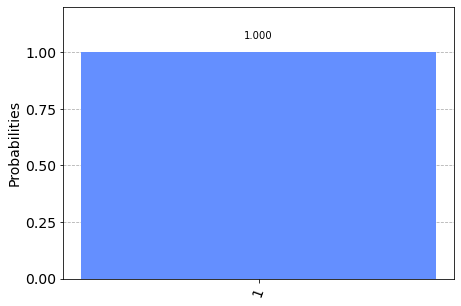

In [5]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [10]:
# an example of p, I-gates

qc = QuantumCircuit(4)
qc.p(pi/4,0)
qc.i(0)
qc.s(1)
qc.sdg(2)
qc.t(3)
qc.tdg(1)
qc.measure_all()
qc.draw(initial_state=True)

┌────────┐ ┌───┐  ░ ┌─┐         
  q_0: |0>┤ P(π/4) ├─┤ I ├──░─┤M├─────────
          └─┬───┬──┘┌┴───┴┐ ░ └╥┘┌─┐      
  q_1: |0>──┤ S ├───┤ Tdg ├─░──╫─┤M├──────
           ┌┴───┴┐  └─────┘ ░  ║ └╥┘┌─┐   
  q_2: |0>─┤ Sdg ├──────────░──╫──╫─┤M├───
           └┬───┬┘          ░  ║  ║ └╥┘┌─┐
  q_3: |0>──┤ T ├───────────░──╫──╫──╫─┤M├
            └───┘           ░  ║  ║  ║ └╥┘
meas: 0 4/═════════════════════╩══╩══╩══╩═
                               0  1  2  3

In [15]:
# Let's have U-gate transform a |0> to |+> state
qc1 = QuantumCircuit(1)
qc1.u(pi/2, 0, pi, 0)
qc1.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

In [16]:
# Let's see the result
qc1.save_statevector()
qobj1 = assemble(qc1)
state = sim.run(qobj1).result().get_statevector()
state

array([0.70710678+0.j, 0.70710678+0.j])